## Importing Libraries

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Reading File

In [16]:
flights = pd.read_csv("is-362-project1.csv")

In [17]:
flights

,Airline Name,status,Los Angeles,Phoenix,San Diego,San Francisco,Seattle
0,Alaska,On time,497,221,212,503,1841
1,Alaska,delayed,62,12,20,102,305
2,AM west,On time,694,4840,383,320,201
3,AM west,delayed,117,415,65,129,61


## Getting Number of Delayed flights in a list for both airlines

In [18]:
alaska_delayed = flights[(flights["Airline Name"] == "Alaska") & ( flights["status"] == "delayed")]
alaska_delayed = alaska_delayed[["Los Angeles",  "Phoenix", "San Diego", "San Francisco", "Seattle"]]
alaska_delayed = list(alaska_delayed.iloc[0])
alaska_delayed

[62, 12, 20, 102, 305]

In [19]:
amwest_delayed = flights[(flights["Airline Name"] == "AM west") & (flights["status"] == "delayed")]
amwest_delayed = amwest_delayed[["Los Angeles",  "Phoenix", "San Diego", "San Francisco", "Seattle"]]
amwest_delayed = list(amwest_delayed.iloc[0])
amwest_delayed

[117, 415, 65, 129, 61]

## Getting Total Number of Flights for both Airlines

In [20]:
flights_total = flights.groupby("Airline Name").sum().reset_index()

In [21]:
flights_total

,Airline Name,Los Angeles,Phoenix,San Diego,San Francisco,Seattle
0,AM west,811,5255,448,449,262
1,Alaska,559,233,232,605,2146


In [22]:
alaska_total = flights_total[(flights_total["Airline Name"] == "Alaska")]
alaska_total = alaska_total[["Los Angeles",  "Phoenix", "San Diego", "San Francisco", "Seattle"]]
alaska_total = list(alaska_total.iloc[0])
alaska_total

[559, 233, 232, 605, 2146]

In [23]:
amwest_total = flights_total[(flights_total["Airline Name"] == "AM west")]
amwest_total = amwest_total[["Los Angeles",  "Phoenix", "San Diego", "San Francisco", "Seattle"]]
amwest_total = list(amwest_total.iloc[0])
amwest_total

[811, 5255, 448, 449, 262]

In [24]:
locations = ["Los Angeles", "Phoenix", "San Diego", "San Francisco", "Seattle"]
locations

['Los Angeles', 'Phoenix', 'San Diego', 'San Francisco', 'Seattle']

# Plotting Delayed Flights for Both Airline

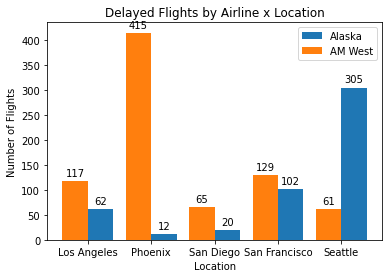

In [31]:

x_axis = np.arange(len(locations))

fig, ax = plt.subplots()

a1 = ax.bar(x_axis + 0.2, alaska_delayed, 0.4, label = "Alaska" )
a2 = ax.bar(x_axis - 0.2, amwest_delayed, 0.4, label = "AM West" )




ax.set_xlabel("Location")
ax.set_ylabel("Number of Flights")
ax.set_title("Delayed Flights by Airline x Location")
ax.set_xticks(x_axis, locations)
ax.legend()


ax.bar_label(a1, padding = 3)
ax.bar_label(a2, padding = 3)
ax.legend()
plt.show()



### From above graph, we can see that AM West Airlines has more number of delayed flight on all locations except Seattle where Alaska airlines has more number of delayed flights

# Calculating Percentage Delayed Flights for Both Airline

## Percentage Delayed

In [29]:
alaska_delayed_percentage = list()
amwest_delayed_percentage = list()

for i in range(len(amwest_delayed)):
    alaska_delayed_percentage.append(round(alaska_delayed[i]/ alaska_total[i], 2))
    amwest_delayed_percentage.append(round(amwest_delayed[i]/ amwest_total[i], 2))


# Plotting Percentage Delayed Flights for Both Airline

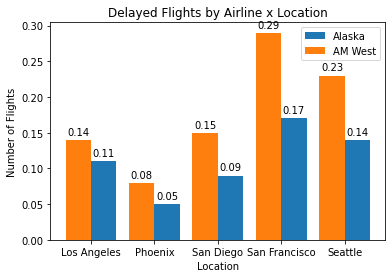

In [30]:

x_axis = np.arange(len(locations))

fig, ax = plt.subplots()

a1 = ax.bar(x_axis + 0.2, alaska_delayed_percentage, 0.4, label = "Alaska" )
a2 = ax.bar(x_axis - 0.2, amwest_delayed_percentage, 0.4, label = "AM West" )




ax.set_xlabel("Location")
ax.set_ylabel("Percentage of Flights")
ax.set_title("Percentage of Delayed Flights by Airline x Location")
ax.set_xticks(x_axis, locations)
ax.legend()


ax.bar_label(a1, padding = 3)
ax.bar_label(a2, padding = 3)
ax.legend()
plt.show()



In [ ]:
print("Average delayed flights for Alaska Airlines:", round(sum(alaska_delayed_percentage)/ len(alaska_delayed_percentage)*100,1), "%")
print("Average delayed flights for AM West Airlines:", round(sum(amwest_delayed_percentage)/ len(amwest_delayed_percentage)*100,1), "%")

### * From above graph, in terms of percentage of total flights at a location, AM West airlines has more percentage of delayed flights across all locations. 
### * On average 17.8% of AM West Airlines are delayed on each location against 11.2% Alaskan Flights